In [30]:
import pandas as pd
import seaborn as sb
import matplotlib as plt
from sklearn.metrics import r2_score
import datetime as dt

In [31]:
sea_level = pd.read_csv('epa-sea-level.csv', parse_dates = ['Year'])
#drop columns 
sea_level.drop(['NOAA Adjusted Sea Level', 'Lower Error Bound', 'Upper Error Bound'], axis = 'columns', inplace = True)
#rename columns
sea_level.rename({'CSIRO Adjusted Sea Level': 'sea level'}, inplace = True, axis = 'columns')
#change year column to just the year
sea_level['Year'] = sea_level['Year'].dt.year
#drop Nan
sea_level.dropna(inplace = True)
sea_level

,Year,sea level
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551
...,...,...
129,2009,8.586614
130,2010,8.901575
131,2011,8.964567
132,2012,9.326772


<AxesSubplot:xlabel='Year', ylabel='sea level'>

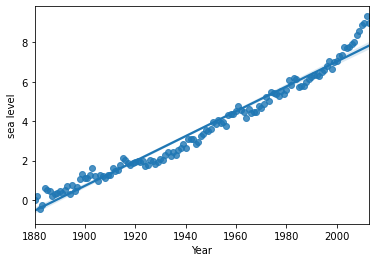

In [32]:
sb.regplot(x = 'Year', y = 'sea level', data = sea_level)

In [36]:
from sklearn.linear_model import LinearRegression

X = sea_level['Year'].values.reshape(-1, 1)
y = sea_level['sea level'].values.reshape(-1, 1)

model = LinearRegression().fit(X,y)
r_sq= model.score(X,y)

print('slope:', model.coef_)
print('intercept:', model.intercept_)
print('coefficent of determination', r_sq)

slope: [[0.06304458]]
intercept: [-119.06594197]
coefficent of determination 0.9697466074149553


In [38]:
pred = model.predict([[2050]])
# 2050 is in double quotes because it requires a list of lists
pred

array([[10.17545526]])